In [1]:


import matplotlib.pyplot as plt
import matplotlib.patches as patches
def step(i, pp, mbn, t_F, t_B, t_W, T):
    if i>=pp/2:
        "dual"
        stage = pp-1-i
        next_stage = i-1
        prev_stage = i+1 if i<pp-1 else None
        up = "down"
        down = "up"
    else:
        stage = i
        next_stage = i+1
        prev_stage = i-1 if i>0 else None
        up = "up"
        down = "down"
    if T[0] < stage:
        "blank" 
        T[0] += 1
        return ['blank']
    if T[0] < stage + (pp-2-stage*2):
        "Down_F"
        T[0] += 1
        return [f'{down}_F']
    elif T[0] < stage + (pp-2-stage*2) + (stage+1)*2:
        "Down_F+Up_F"
        T[0] += 2
        return [f'{down}_F', f'{up}_F']
    elif T[0] < stage + (pp-2-stage*2) + (stage+1)*2 + (pp/2-1-stage)*3:
        T[0] += 3
        return [f"{up}_B", f'{up}_W', f"{up}_F"]
    elif T[0] < stage + (pp-2-stage*2) + (stage+1)*2 + (pp/2-1-stage)*3 + (pp/2-1-stage):
        "blank"
        T[0] += 1
        return ['blank']
    elif T[0] < stage + (pp-2-stage*2) + (stage+1)*2 + (pp/2-1-stage)*3 + (pp/2-1-stage) + (mbn-pp+stage+1)*6:
        T[0] += 6
        # return [f"{down}_F", f'{up}_B', f"{up}_W", f"{up}_F", f"{down}_B", f"{down}_W"]
        return [f"{down}_F", f"{up}_BW_overlap", f"{up}_F", f"{down}_BW_overlap"]
    elif T[0] < stage + (pp-2-stage*2) + (stage+1)*2 + (pp/2-1-stage)*3 + (pp/2-1-stage) + (mbn-pp+stage+1)*6 + (pp/2-1-stage)*6:
        "blank-Up_BW-Up_F-overlap"
        T[0] += 6
        return ["blank", f"{up}_BW", f"{up}_F", f"{down}_BW_overlap"]
    elif T[0] < stage + (pp-2-stage*2) + (stage+1)*2 + (pp/2-1-stage)*3 + (pp/2-1-stage) + (mbn-pp+stage+1)*6 + (pp/2-1-stage)*6 + ((stage+1)*3-1):
        even = T[0]-(stage + (pp-2-stage*2) + (stage+1)*2 + (pp/2-1-stage)*3 + (pp/2-1-stage) + (mbn-pp+stage+1)*6 + (pp/2-1-stage)*6)
        even = even//3%2
        
        if T[0] < stage + (pp-2-stage*2) + (stage+1)*2 + (pp/2-1-stage)*3 + (pp/2-1-stage) + (mbn-pp+stage+1)*6 + (pp/2-1-stage)*6 + (stage*3):
            T[0] += 3 #"blank- BW"
            result =  ["blank"]
        else:
            T[0] += 2 #"BW"
            result = []
        if not even:
            result += [f"{up}_BW"]
        else:
            result += [f"{down}_BW"]
        return result
    elif T[0] < stage + (pp-2-stage*2) + (stage+1)*2 + (pp/2-1-stage)*3 + (pp/2-1-stage) + (mbn-pp+stage+1)*6 + (pp/2-1-stage)*6 + ((stage+1)*3-1) + stage:
        even = T[0]-(stage + (pp-2-stage*2) + (stage+1)*2 + (pp/2-1-stage)*3 + (pp/2-1-stage) + (mbn-pp+stage+1)*6 + (pp/2-1-stage)*6 + ((stage+1)*3-1))
        even = even + stage
        even = even%2
        if not even:
            result = [f"{down}_B"]
        else:
            result = [f"{up}_B"]
        T[0] += 1
        return result
    
    elif T[0] < stage + (pp-2-stage*2) + (stage+1)*2 + (pp/2-1-stage)*3 + (pp/2-1-stage) + (mbn-pp+stage+1)*6 + (pp/2-1-stage)*6 + ((stage+1)*3-1) + stage + (pp/2-stage)*2:
        T[0] += 2
        return [f"{down}_B", f"{down}_W"]
    
    elif T[0] < stage + (pp-2-stage*2) + (stage+1)*2 + (pp/2-1-stage)*3 + (pp/2-1-stage) + (mbn-pp+stage+1)*6 + (pp/2-1-stage)*6 + ((stage+1)*3-1) + stage + (pp/2-stage)*2 + stage//2:
        T[0] += 1
        return [f"{down}_W"]
    elif T[0] < stage + (pp-2-stage*2) + (stage+1)*2 + (pp/2-1-stage)*3 + (pp/2-1-stage) + (mbn-pp+stage+1)*6 + (pp/2-1-stage)*6 + ((stage+1)*3-1) + stage + (pp/2-stage)*2 + stage//2 + (stage-stage//2):
        T[0] += 1
        return [f"{up}_W"]  
    elif T[0] < mbn*6+stage+(pp/2-1-stage)+(pp/2-1-stage)+stage:
        T[0] += 1
        # return [f"{down}_W"]
    return 'done'

def pipe(pp, mbn, t_F, t_B, t_W, figsize=30):
    trace = {i:[] for i in range(pp)}
    for stage in range(pp):
        tmp = []
        T = [0]
        while True:
            x = step(stage, pp, mbn, t_F, t_B, t_W, T)
            if x == 'done':
                break
            trace[pp-1-stage] += x


    data = trace


    # 颜色映射
    color_map = {
        'blank': 'white',
        'down_F': 'yellow',
        'up_F': 'darkorange',
        'down_B': 'forestgreen',
        'up_B': 'forestgreen',
        'down_W': 'darkblue',
        'up_W': 'lightblue',
        'down_BW': 'forestgreen',
        'up_BW': 'forestgreen',
        'down_BW_overlap': 'lime',
        'up_BW_overlap': 'chartreuse'
    }

    # 记录序号


    # 创建图表
    fig, ax = plt.subplots(figsize=(figsize, len(data)))

    for i, (key, lst) in enumerate(data.items()):
        x = 0  # 当前行的起始位置
        count = {'down_F': 0, 'up_F': 0, 'down_B': 0, 'up_B': 0, 'down_W': 0, 'up_W': 0}
        for element in lst:
            color = color_map.get(element, 'white')  # 默认白色
            width = 2 if 'BW' in element else 1  # BW 宽度为 2
            edgecolor = 'black'
            
            # 计算编号
            if element in count:
                label = f"{count[element]}"
                
                count[element] += 1
            elif 'down_BW' in element:
                label = f"{count['down_W']}"
                
                count['down_B'] += 1
                count['down_W'] += 1
            
            elif 'up_BW' in element:
                label = f"{count['up_W']}"
                
                count['up_B'] += 1
                count['up_W'] += 1
            elif "down_B" in element:
                label = f"{count['down_B']}"
                count['down_B'] += 1
            elif "up_B" in element:
                label = f"{count['up_B']}"
                count['up_B'] += 1  
            elif "down_W" in element:
                label = f"{count['down_W']}"
                count['down_W'] += 1
            elif "up_W" in element: 
                label = f"{count['up_W']}"
                count['up_W'] += 1
            else:
                label = ""
            if 'up' in element:
                label = f"{label}↑"
            # 绘制矩形
            rect = patches.Rectangle((x, i), width, 1, linewidth=1, edgecolor=edgecolor, facecolor=color)
            ax.add_patch(rect)
            
            # 添加文本标签
            ax.text(x + width / 2, i + 0.5, label, fontsize=8, ha='center', va='center', color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))
            
            x += width  # 更新起始位置

    # 设置轴
    max_x = max(sum(2 if element in ['down_BW', 'up_BW', 'down_BW_overlap', 'up_BW_overlap'] else 1 for element in lst) for lst in data.values())
    ax.set_xlim(0, max_x)
    ax.set_ylim(0, len(data))
    # ax.set_xticks(range(max_x + 1))
    # ax.set_yticks(range(len(data) + 1))
    # ax.set_yticklabels(data.keys())
    ax.set_aspect('equal')
    ax.set_frame_on(False)

    plt.show()





In [ ]:
pp = 8
mbn = 10
t_F = 1
t_B = 1
t_W = 1
pipe( pp, mbn, t_F, t_B, t_W)

In [ ]:
pp = 8
mbn = 8
t_F = 1
t_B = 1
t_W = 1

Comm = {}
pipe( pp, mbn, t_F, t_B, t_W)

In [ ]:
pp = 16
mbn = 20
t_F = 1
t_B = 1
t_W = 1

Comm = {}
pipe( pp, mbn, t_F, t_B, t_W, figsize=60)

pp通信的影响：
- pp time应该影响bubble的计算
- 多出来的pp通信很自然藏在了bubble里

**暂时不考虑pp通信的耗时**

1. F&B的单次时间可以用 max(comm_ed-comm_st, gemm_ed-gemm_st)

如果F&B多个相邻，左侧comm和右侧的gemm多出来的部分，自然的和下一组F&B掩盖

如果F&B是独立的，那么其左右一定有pp的bubble，可以容纳多出来的部分

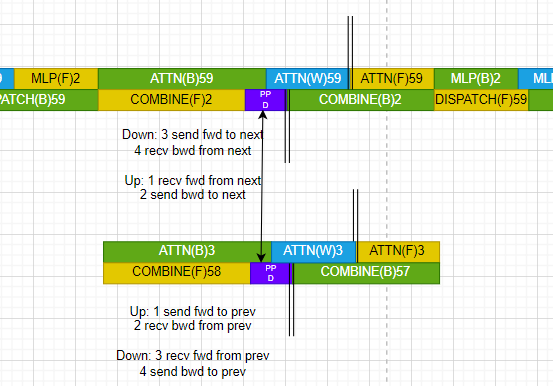

F的时间考虑非掩盖的，从attn到combine的全过程

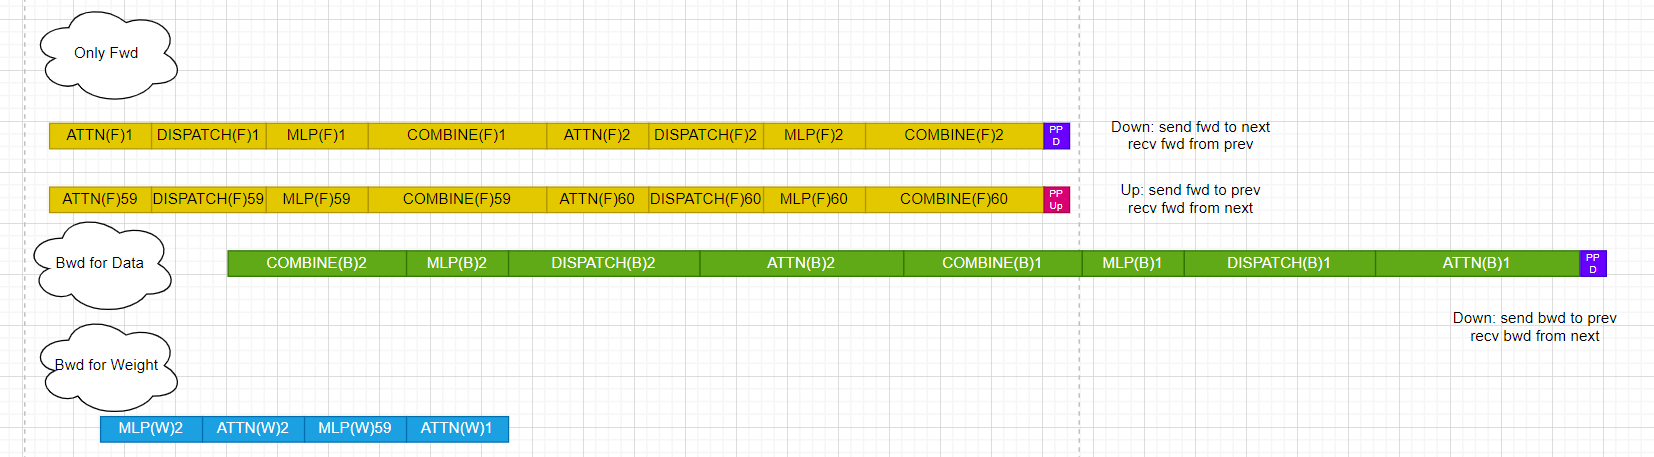

**F&B的个数**

第i个stage，一共(mbn-pp+1+i)*(Down_F-overlap + Up_F-overlap)+(pp/2-i-1)Up_F-overlap = (2mbn-3/2 pp+i + 1) F&B

**bubble 大小**

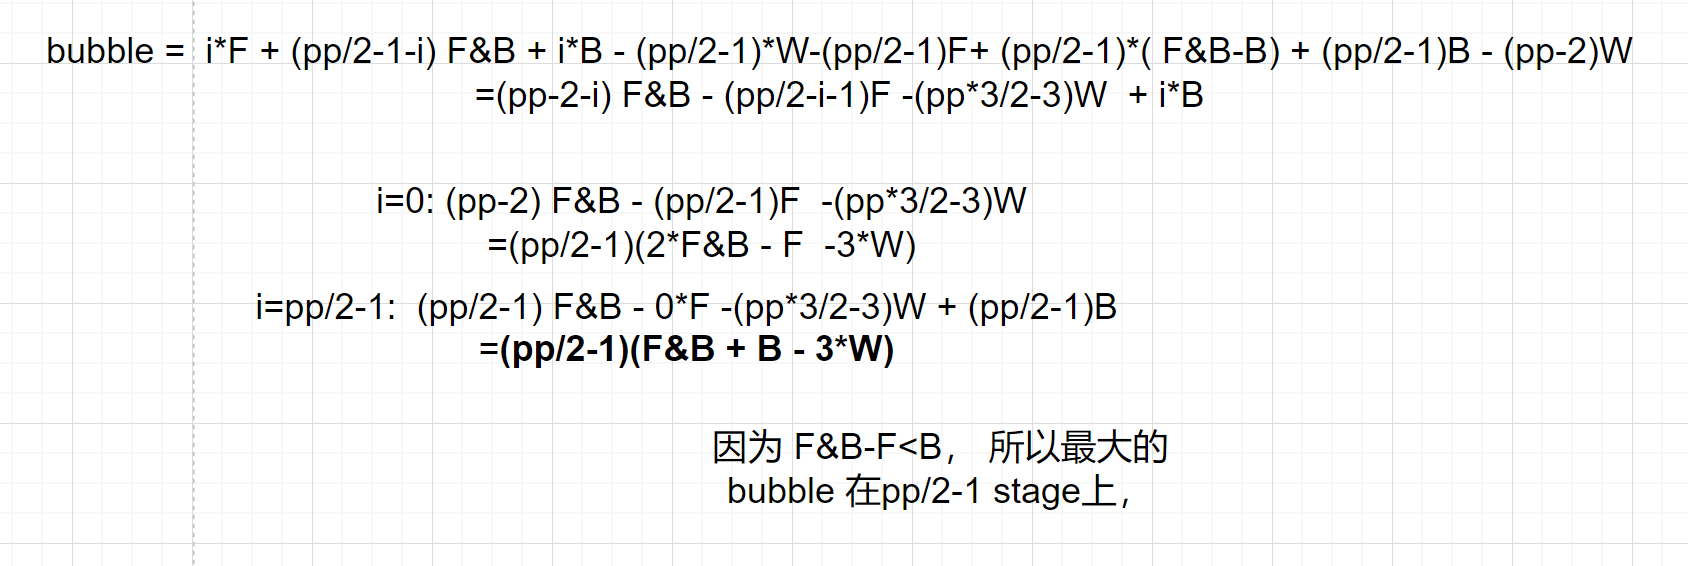

**optimizer step 耗时**

0和pp-1两个stage一起考虑，相当于dp\*2，然后W\*2, ZeRO1 每个rank上shard 2W/2dp=W/dp 的optim项，gradient的RS通信量2倍, rank内更新optim大小不变，weight的AG通信量2倍。 后面先简单的用2倍耗时来估计   

**总耗时**

mbn * (F+B) * 2 - (2mbn-3/2 pp+i + 1)*(F+B-F&B) + bubble + optimizer

GroupGEMM效率

a100 ：
blcok- stream无overlap

5.093ms  $24184*5120*3072*2/5093/1e6/312=0.478$

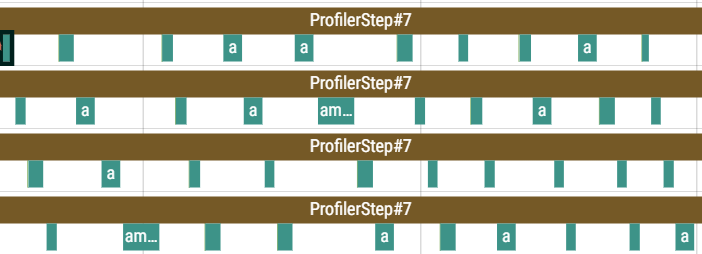
unblcok- stream overlap

3.346ms  $23168*5120*3072*2/3346/1e6/312=0.698$
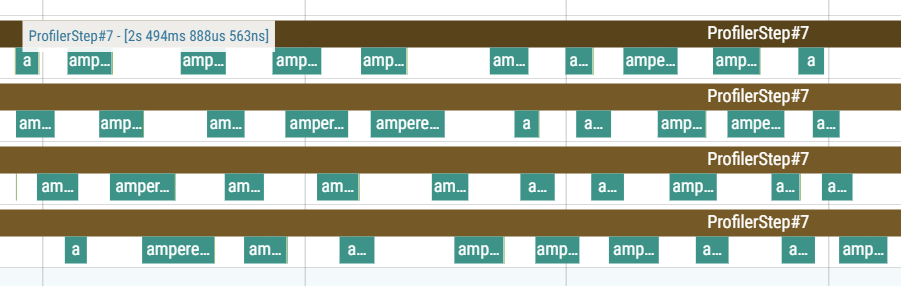

s5000:

In [5]:
# def duration_dualpp(mbn, pp, F_cost, B_cost, W_cost, FandB_cost, opt_time, stage):
#     bubble = (pp-2-stage)*FandB_cost - (pp/2-stage-1)*F_cost - (pp*3/2-3)*W_cost + stage*B_cost
#     duration = mbn * (F_cost + B_cost) * 2 - (2*mbn-3/2*pp + stage + 1) * (F_cost + B_cost - FandB_cost) + bubble + opt_time
#     return duration

In [6]:
# def cal_FandB(attn_F, MLP_F, attn_B, attn_W, MLP_B, MLP_W, Dispatch, Combine,):
#     t_compute = {"attn_F":[], "MLP_F":[], "attn_B":[], "attn_W":[],"MLP_B":[], "MLP_W":[]}
#     t_comm = {"Dispatch_F":[], "Combine_F":[], "Dispatch_B":[], "Combine_B":[]}
    
#     t_compute['attn_F'] = [0,attn_F]
#     t_comm['Dispatch_F'] = [t_compute['attn_F'][1], t_compute['attn_F'][1]+Dispatch]


#     t_compute['MLP_B'] = [attn_F, attn_F+MLP_B]
#     t_sync = max(t_compute['MLP_B'][1], t_comm['Dispatch_F'][1])
#     t_comm['Dispatch_B'] = [t_sync, t_sync+Dispatch]

#     t_compute['MLP_W'] = [t_compute['MLP_B'][1], t_compute['MLP_B'][1]+MLP_W]
#     t_compute['MLP_F'] = [t_compute['MLP_W'][1], t_compute['MLP_W'][1]+MLP_F]

#     t_sync =   max( t_compute['MLP_F'][1], t_comm['Dispatch_B'][1])
#     t_comm['Combine_F'] = [t_sync, t_sync+Combine]
#     t_compute['attn_B'] = [t_sync, t_sync+attn_B]
    
#     t_sync = max( t_compute['attn_B'][1], t_comm['Combine_F'][1])
#     t_comm['Combine_B'] = [t_sync, t_sync+Combine]
#     t_compute['attn_W'] = [t_compute['attn_B'][1], t_compute['attn_B'][1]+attn_W]
#     compute_dur = t_compute['attn_W'][1] - t_compute['MLP_B'][0]
#     comm_dur = t_comm['Combine_B'][1] - t_comm['Dispatch_F'] [0]
#     return compute_dur, comm_dur, t_compute, t_comm
# compute_dur, comm_dur, t_compute, t_comm = cal_FandB(attn_F=1, MLP_F=1, attn_B=1.5, attn_W=0.8, MLP_B=1.2, MLP_W=1, Dispatch=2, Combine=2)

In [ ]:
# def show_overlap_all2all(t_compute,t_comm):
#     data1,data2 = t_compute,t_comm

#     fig, ax = plt.subplots(figsize=(14, 1))
#     color_map = {
#     'F': 'yellow',
#     'W': 'lightblue',
#     'B': 'green'
#     }
#     # 绘制data1
#     for i, (key, intervals) in enumerate(data1.items()):
#         for j in range(0, len(intervals), 2):
#             start, end = intervals[j], intervals[j+1]
#             facecolor = color_map.get(key.split('_')[-1], 'none')
#             rect = patches.Rectangle((start, 1), end - start, 1, edgecolor='blue', facecolor=facecolor, linewidth=2)
#             ax.add_patch(rect)
#             ax.text((start + end) / 2, 1.2, key, color='blue', ha='center', va='center')

#     # 绘制data2
#     for i, (key, intervals) in enumerate(data2.items()):
#         for j in range(0, len(intervals), 2):
#             start, end = intervals[j], intervals[j+1]
#             facecolor = color_map.get(key.split('_')[-1], 'none')
#             rect = patches.Rectangle((start, 0), end - start, 1, edgecolor='red', facecolor=facecolor, linestyle='--', linewidth=2)
#             ax.add_patch(rect)
#             ax.text((start + end) / 2, 0.2, key, color='red', ha='center', va='center')

#     ax.set_yticks([0, 2])
#     ax.set_xlabel('Time')
#     ax.set_title('Intervals for Multiple Groups')
#     ax.set_xlim( -1, max(data1['attn_W'][-1], data2['Combine_B'][-1]+1))
#     plt.grid(True)
#     plt.show()



# def cal_FandB_multi_layers(attn_F, MLP_F, attn_B, attn_W, MLP_B, MLP_W, Dispatch, Combine, layers=1, if_show=True):
#     t_compute = {"attn_F":[], "MLP_F":[], "attn_B":[], "attn_W":[],"MLP_B":[], "MLP_W":[]}
#     t_comm = {"Dispatch_F":[], "Combine_F":[], "Dispatch_B":[], "Combine_B":[]}
    
#     t_compute['attn_F'] = [0,attn_F]
#     t_comm['Dispatch_F'] = [t_compute['attn_F'][1], t_compute['attn_F'][1]+Dispatch]

#     for i in range(layers):
#         t_compute['MLP_B'] += [t_compute['attn_F'][-1], t_compute['attn_F'][-1]+MLP_B]
#         t_sync = max(t_compute['MLP_B'][-1], t_comm['Dispatch_F'][-1])
#         t_comm['Dispatch_B'] += [t_sync, t_sync+Dispatch]

#         t_compute['MLP_W'] += [t_compute['MLP_B'][-1], t_compute['MLP_B'][-1]+MLP_W]
#         t_compute['MLP_F'] += [t_compute['MLP_W'][-1], t_compute['MLP_W'][-1]+MLP_F]

#         t_sync =   max( t_compute['MLP_F'][-1], t_comm['Dispatch_B'][-1])
#         t_comm['Combine_F'] += [t_sync, t_sync+Combine]
#         t_compute['attn_B'] += [t_sync, t_sync+attn_B]
        
#         t_sync = max( t_compute['attn_B'][-1], t_comm['Combine_F'][-1])
#         t_comm['Combine_B'] += [t_sync, t_sync+Combine]
#         t_compute['attn_W'] += [t_compute['attn_B'][-1], t_compute['attn_B'][-1]+attn_W]
        
#         if i<layers-1:
#             t_compute['attn_F'] += [t_compute['attn_W'][-1],t_compute['attn_W'][-1]+attn_F]
#             t_sync =   max( t_compute['attn_F'][-1], t_comm['Combine_B'][-1])
#             t_comm['Dispatch_F'] += [t_sync, t_sync+Dispatch]

#     compute_dur = t_compute['attn_W'][-1] - t_compute['attn_F'][0]
#     comm_dur = t_comm['Combine_B'][-1] - t_comm['Dispatch_F'] [0]
#     if if_show:
#         show_overlap_all2all(t_compute, t_comm)
#     return compute_dur, comm_dur, t_compute, t_comm

from simumax.pp_simu.utils import cal_FandB_multi_layers, perf_dualpp
compute_dur, comm_dur, t_compute, t_comm = cal_FandB_multi_layers(attn_F=1, MLP_F=1, attn_B=1.5, attn_W=0.8, MLP_B=1.2, MLP_W=1, Dispatch=2, Combine=2,layers=2, save_path=None)

```  (1->4): LLMBlock(
    (0): LayerNorm(norm_size=5120,norm_type=rms_norm,use_fused_norm=True,enable_recompute=False)
    (1): MLAAttention(
      (0): LinearCol(input_size=5120,output_size=1536,use_bias=False,enable_recompute=True)
      (1): LayerNorm(norm_size=1536,norm_type=rms_norm,use_fused_norm=True,enable_recompute=False)
      (2): LinearCol(input_size=1536,output_size=24576,use_bias=False,enable_recompute=True)
      (4): LinearCol(input_size=5120,output_size=576,use_bias=False,enable_recompute=True)
      (6): LayerNorm(norm_size=512,norm_type=rms_norm,use_fused_norm=True,enable_recompute=False)
      (7): LinearCol(input_size=512,output_size=32768,use_bias=False,enable_recompute=True)
      (9): MLACoreAttention(head_size=192,head_num=128,kv_head_num=128,use_math_sdp=False,use_flash_sdp=True,enable_recompute=True)
      (10): LinearCol(input_size=16384,output_size=5120,use_bias=False,enable_recompute=True)
    )
    (2): LayerNorm(norm_size=5120,norm_type=rms_norm,use_fused_norm=True,enable_recompute=False)
    (3): ExpertMLP(
      (0): MLP(
        (0): LinearCol(input_size=5120,output_size=6144,use_bias=False,enable_recompute=False)
        (1): Swiglu(is_fused=True,enable_recompute=False)
        (2): LinearRow(input_size=3072,output_size=5120,use_bias=False,enable_recompute=False)
      )
      (1): Router()
      (2): Permutation()
      (3): GroupLinearCol(input_size=5120,output_size=3072,local_expert_num=20,use_bias=False)
      (4): Swiglu(is_fused=True,enable_recompute=False)
      (5): GroupLinearRow(input_size=1536,output_size=5120,local_expert_num=20,use_bias=False)
      (6): UnPermutation()
    )
```

把非通信部分都并入attn或mlp里：

attn: 从前一个layernorm到permutation里的计算部分，其中permuation的计算有一部分在all2all之后，暂时不考虑这么细
```
(1)LLMBlock -> (0)LayerNorm
(1)LLMBlock -> (1)MLAAttention
(1)LLMBlock -> (2)LayerNorm
(1)LLMBlock -> (3)ExpertMLP -> (1)Router
(1)LLMBlock -> (3)ExpertMLP -> (2)Permutation
```
MLP: 从sharedExpert(0-MLP),GroupLinearCol到Unpermutation里的计算部分，其中Unpermuation的计算有一部分在all2all之后，暂时不考虑这么细

```
(1)LLMBlock -> (3)ExpertMLP -> (3)GroupLinearCol
(1)LLMBlock -> (3)ExpertMLP -> (4)Swiglu
(1)LLMBlock -> (3)ExpertMLP -> (5)GroupLinearRow
(1)LLMBlock -> (3)ExpertMLP -> (6)UnPermutation
(1)LLMBlock -> (3)ExpertMLP -> (0)MLP
```

In [8]:
# def mfu_dualpp(mbn, pp, F_cost, B_cost, W_cost, FandB_cost, opt_time, stage, Flops_perbatch, default_flops=465):
#     """
#     opt_time: the cost of gradient reduce in 1F1B + weight update
#     mbn: micro batch number in up/down stream
#     Flops_perbatch: Flops each rank each batch 
#     """
#     opt_time = opt_time*2  #both opt in down and up need to be considered, 
#                            #gradient size in each rank is 2 times of the original, weight update cost is the same 

#     dur = duration_dualpp(mbn, pp, F_cost, B_cost, W_cost, FandB_cost, opt_time, stage)
#     flops = Flops_perbatch * mbn * 2
    
#     mfu = flops / dur / default_flops / 1e12
#     return mfu

# def cal_cost(attn_F, MLP_F, attn_B, attn_W, MLP_B, MLP_W, Dispatch, Combine, layers):
#     """
#     *_B is the time cost of bwd for output 
#     *_W is the time cost of bwd for weight
    
#     return
#     B_cost denotes the execution time of a full backward chunk
#     W_cost denotes the execution time of a "backward for weights" chunk
#     """
#     F_cost = attn_F + Dispatch + MLP_F + Combine
#     F_cost *= layers
#     W_cost = (MLP_W + attn_W) 
#     W_cost *= layers
#     B_cost = Combine + MLP_B + Dispatch + attn_B
#     B_cost *= layers 
#     B_cost += W_cost

#     # compute_dur, comm_dur, t_compute, t_comm = cal_FandB(attn_F, MLP_F, attn_B, attn_W, MLP_B, MLP_W, Dispatch, Combine)
#     # FandB_cost = max(comm_dur, compute_dur)
#     # FandB_cost *= layers
#     compute_dur, comm_dur, _, _=cal_FandB_multi_layers(attn_F, MLP_F, attn_B, attn_W, MLP_B, MLP_W, Dispatch, Combine, layers=1, if_show=True)
#     FandB_cost = max(comm_dur, compute_dur)
#     return F_cost, W_cost, B_cost, FandB_cost

# def perf_dualpp(mbn, pp, attn_F, MLP_F, attn_B, attn_W, MLP_B, MLP_W, Dispatch, Combine,layers, opt_time, stage, Flops_perbatch, default_flops=465):
#     """
#     opt_time: the cost of gradient reduce in 1F1B + weight update
#     mbn: micro batch number in up/down stream
#     """
#     F_cost, W_cost, B_cost, FandB_cost=cal_cost(attn_F, MLP_F, attn_B, attn_W, MLP_B, MLP_W, Dispatch, Combine, layers)
#     mfu = mfu_dualpp(mbn, pp, F_cost, B_cost, W_cost, FandB_cost, opt_time, stage, Flops_perbatch, default_flops=default_flops)
#     return mfu

In [ ]:
mbn, pp, attn_F, MLP_F, attn_B, attn_W, MLP_B, MLP_W, Dispatch, Combine,layers, opt_time, stage, Flops_perbatch =           (120, 16, 7.414975805257143, 4.801485218753557*2, 18.726149556538253, 3.5059252564175516, 4.191651234378558, 4.001924671878557*2, 2.18078125, 2.18078125, 4, 195.03390000000002, 7, 49796932435968.0)

mfu = perf_dualpp(mbn, pp, attn_F, MLP_F, attn_B, attn_W, MLP_B, MLP_W, Dispatch, Combine,layers, opt_time, stage, Flops_perbatch, default_flops=465, save_path=None)
print(f"mfu in dualpp is {mfu}")


In [ ]:
"""
0.045
0.008
0.024

0.097
0.017
0.064

0.09
0.018
0.064

0.09
0.017
0.064

0.066
0.014
0.041

0.167
0.023
0.091

0.046
0.01
0.032

0.166
0.026
0.104

0.092
0.018
0.066

0.046
0.09
0.028

0.038
0.008
0.019

0.066
0.012
0.039

0.117
0.02
0.066

0.046
0.01
0.028

0.046
0.007
0.024

0.066
0.013
0.039

0.065
0.013
0.029

0.046
0.01
0.028

0.091
0.017
0.052

0.07
0.014
0.042
"""

"""
[80, 5120]
[80, 3072]
[80, 1536]

[1856, 5120]
[1856, 3072]
[1856, 1536]

[1744, 5120]
[1744, 3072]
[1744, 1536]

[1744, 5120]
[1744, 3072]
[1744, 1536]

[1072, 5120]
[1072, 3072]
[1072, 1536]

[2928, 5120]
[2928, 3072]
[2928, 1536]

[400, 5120]
[400, 3072]
[400, 1536]

[3632, 5120]
[3632, 3072]
[3632, 1536]

[1904, 5120]
[1904, 3072]
[1904, 1536]

[208, 5120]
[208, 3072]
[208, 1536]

[128, 5120]
[128, 3072]
[128, 1536]

[960, 5120]
[960, 3072]
[960, 1536]

[2064, 5120]
[2064, 3072]
[2064, 1536]

[320, 5120]
[320, 3072]
[320, 1536]

[96, 5120]
[96, 3072]
[96, 1536]

[944, 5120]
[944, 3072]
[944, 1536]

[736, 5120]
[736, 3072]
[736, 1536]

[512, 5120]
[512, 3072]
[512, 1536]

[1488, 5120]
[1488, 3072]
[1488, 1536]

[1120, 5120]
[1120, 3072]
[1120, 1536]
"""

# SyntaxError: invalid syntax
# >>> sum([float(i) for i in x.split('\n')[1:-1:4]])
# 1.5560000000000003
# >>> 4096*6*5120*3072*2/1.56/1e-3/1e12/465
# 1.0657487086848636
# >>> sum([float(i) for i in x.split('\n')[1:-1:4]][:10])
# 0.9050000000000001


tokens = [80.0, 1856.0, 1744.0, 1744.0, 1072.0, 2928.0, 400.0, 3632.0, 1904.0, 208.0, 128.0, 960.0, 2064.0, 320.0, 96.0, 944.0, 736.0, 512.0, 1488.0, 1120.0]
times_gemm1 = [0.045, 0.097, 0.09, 0.09, 0.066, 0.167, 0.046, 0.166, 0.092, 0.046, 0.038, 0.066, 0.117, 0.046, 0.046, 0.066, 0.065, 0.046, 0.091, 0.07]
times_gemm2 = [0.024, 0.064, 0.064, 0.064, 0.041, 0.091, 0.032, 0.104, 0.066, 0.028, 0.019, 0.039, 0.066, 0.028, 0.024, 0.039, 0.029, 0.028, 0.052, 0.042]
n,k = 5120, 3072
n2,k2=1536,1536
m = sum(tokens)
m*n*k*2/sum(times_gemm1)/1e9/465 
####groupgemm1   1.04
m*n2*k2*2/sum(times_gemm2)/1e9/465
#0.25
(m*n*k*2+m*n2*k2*2)/(sum(times_gemm1)+sum(times_gemm2))/1e9/465 
#0.744
import numpy as np
a = np.array(tokens)
b=np.array(times_gemm1)
r1 = n*k*2*a/b/1e9/465
#array([0.12026678, 1.29441773, 1.31090792, 1.31090792, 1.09880105,
#       1.18610413, 0.58826143, 1.48015081, 1.4000622 , 0.30589594,
#       0.2278739 , 0.98400094, 1.19341652, 0.47060914, 0.14118274,
#       0.96760092, 0.76600688, 0.75297463, 1.10619007, 1.08240103])
(n*k*2*a/b/1e9/465).mean()
#0.89
x = np.array(tokens)
y=np.array(times_gemm2)
r2 = n2*k2*2*a/b/1e9/465
#array([0.01804002, 0.19416266, 0.19663619, 0.19663619, 0.16482016,
#       0.17791562, 0.08823921, 0.22202262, 0.21000933, 0.04588439,
#       0.03418109, 0.14760014, 0.17901248, 0.07059137, 0.02117741,
#       0.14514014, 0.11490103, 0.11294619, 0.16592851, 0.16236015])
(n2*k2*2*a/b/1e9/465).mean()
#0.13341024519595757




In [ ]:
r1

In [ ]:
r1_mem = (n*a+n*k+k*a)/b/1e9/1600
r1_mem

In [ ]:
x=[3.6,6,7.9,39.6,42,50]
import numpy as np
np.array(x)*28/32